__ Для опытов над моделями удобно использовать библиотеку для pytorch - torchvision __

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torchvision.models as models
from IPython.core.display import display, HTML, Markdown
import math
from operator import mul
from functools import reduce

In [2]:
# Вспомогательная функция для печати
def html_print(List):
    out = ''
    
    for Text, Data in List:
        f_str = '{1:,}' if type(Data) == int else '{1}'
        if len(out) > 0: out += ', ' 
        out += ("<font size=6>{0}</font> <font color=blue size=6> "+f_str).format(Text, Data) + "</font><br>"
    display(HTML(out))
    
def display_gif(fn):
    from IPython import display
    return display.HTML('<img src="{}">'.format(fn))
    
def print_size(text, size_vec, float_size=4):
    res = "%d bytes " % float_size
    total = 4
    for item_size in size_vec:
        res += 'x%d' % item_size
        total *= item_size
    res += "={0:,}".format(total)
    html_print([(text, res)])
    
def print_sizes(Text, Sizes):
    size = '' 
    for s in Sizes:
        l = "%d"%s[0]
        for ss in s[1:]:
            l += 'x%d'%ss
            
        if len(size) > 0: size += ' + '
        size += l
        
    html_print([(Text,size)])

# <font size=10 color=blue>Как понять какая сеть "круче"?</font>

## MNIST
---
THE MNIST DATABASE of handwritten digits

Yann LeCun, Courant Institute, NYU

Corinna Cortes, Google Labs, New York

Christopher J.C. Burges, Microsoft Research, Redmond

#### Изображения цифр от 0 до 9 в черно-белом виде размера 28x28

train 60 000, test 10 000

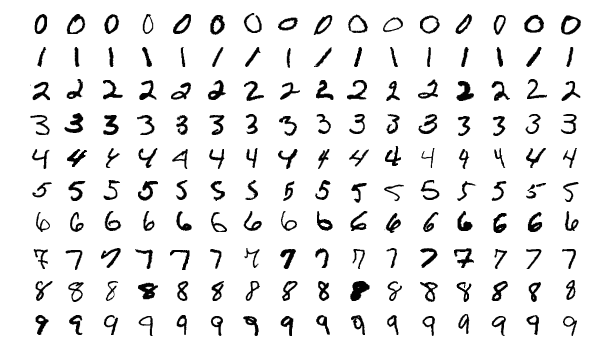



## CIFAR10 (100)

The CIFAR-10 and CIFAR-100 are labeled subsets of the 80 million tiny images dataset. 

They were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton.


Картинки из 10 классов и 100 подклассов размером 32x32x3

50 000 train, 10 000 test

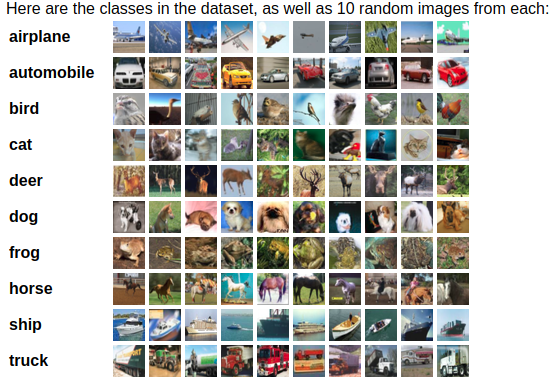


## ImageNet

###  Large Scale Visual Recognition Challenge (ILSVRC) - 1000 classes

train 1 200 000, test 150 000

Total number of images: 14,197,122 (на сегодня)

Средний размер картинок в ImageNet 469x387 pix, обычно приводят к 256x256 и кропают до 224x224 - но даже 224x224 в 50 раз больше CIFAR по кол-ву пикселей



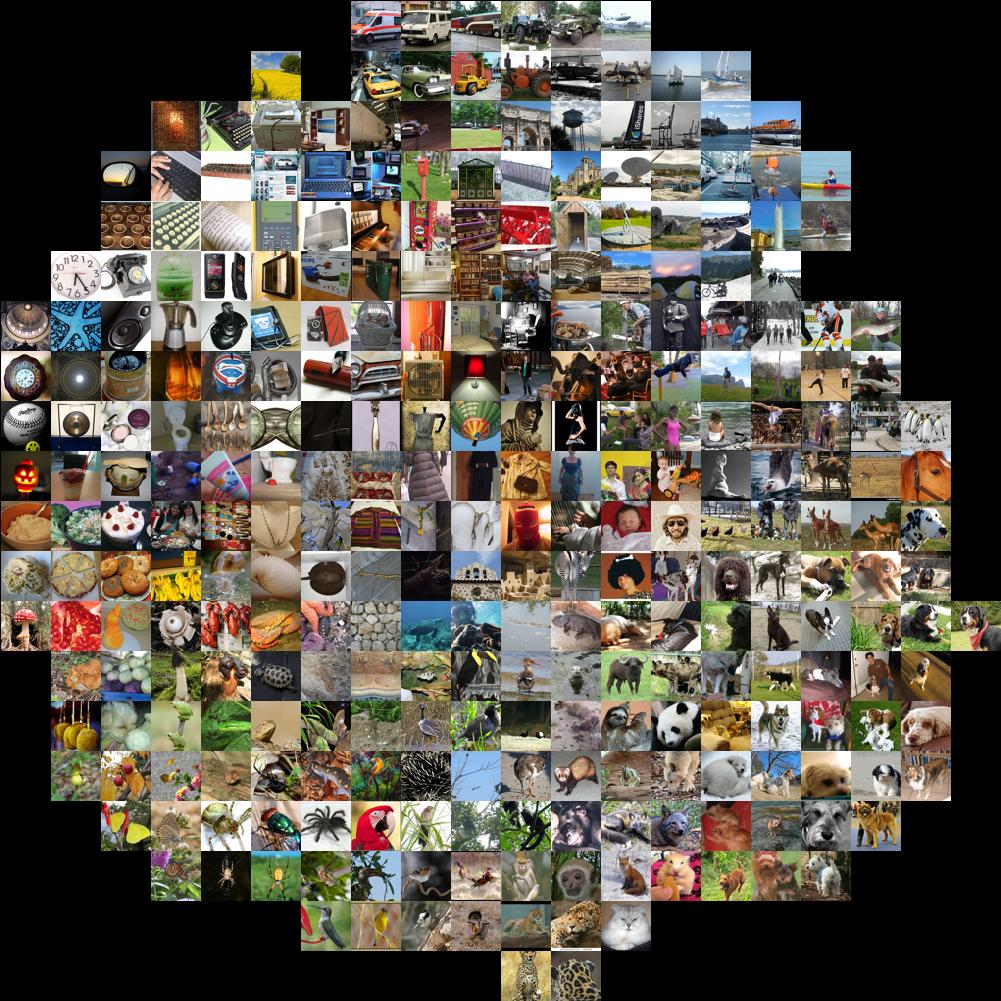

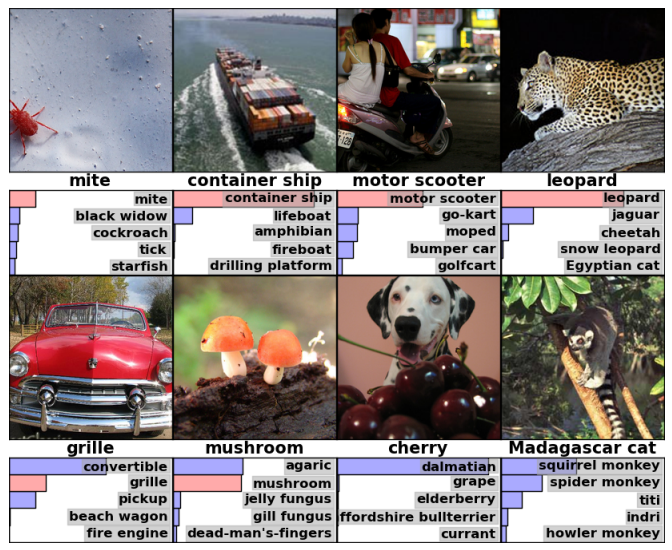

# <font size=10 color=blue>LeNet</font>
### _ [LeCun et al., 1998] _
---
![LeNet](./img/lenet.png)

<font size=5>
* Конволюции:  фильтры 5x5, страйд 1 <br/><br/>
* Сабсамплинг aka пулиг:  фильтры 2x2 , страйд 2 <br/><br/>
* Архитектура: [CONV-POOL-CONV-POOL-FC-FC]

</font>
---


#### Одна из первых конволюционных сетей - выбила хорошие результаты на MNIST
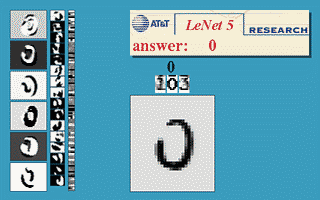
___

# <font size=10 color=blue> LSVRC-2017 </font>
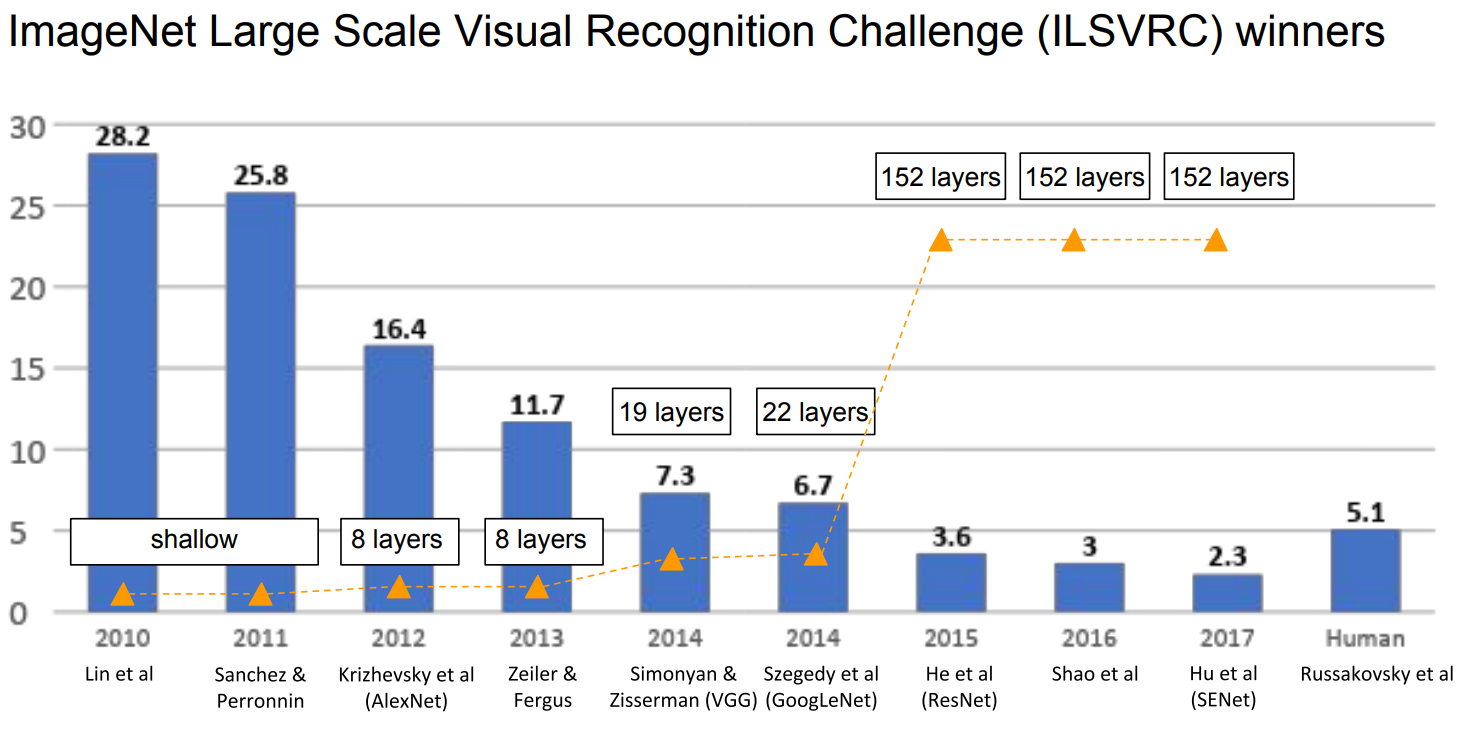


# <font size=10 color=blue>AlexNet</font> 
### _ [Krizhevsky et al. 2012] _

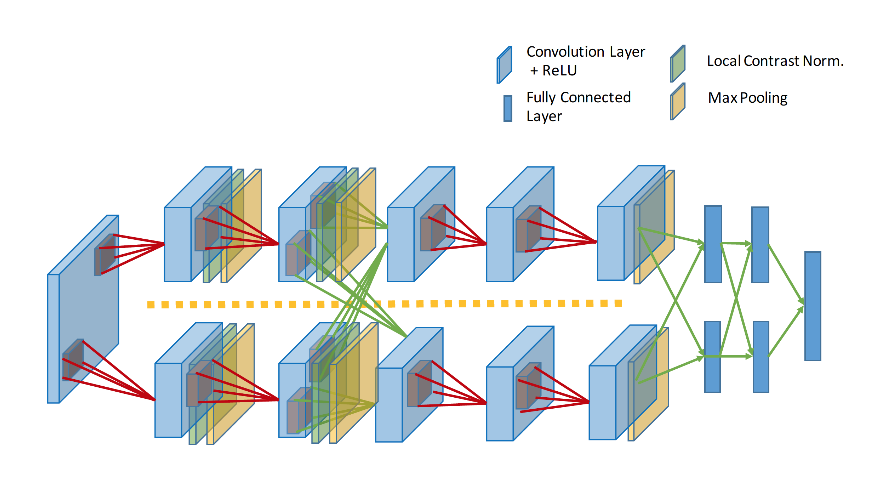
![AlexNet](img/alexnet.png)

<font size='5'> В 2012 году решение на основе AlexNet выиграло соревнование ILSVRC'12 (ImageNet)</font>

# <font color=blue size=8>AlexNet - архитектура </font>

AlexNet. 

The first work that popularized Convolutional Networks in Computer Vision was the AlexNet, developed by Alex Krizhevsky, Ilya Sutskever and Geoff Hinton. The AlexNet was submitted to the ImageNet ILSVRC challenge in 2012 and significantly outperformed the second runner-up (top 5 error of 16% compared to runner-up with 26% error). The Network had a very similar architecture to LeNet, but was deeper, bigger, and featured Convolutional Layers stacked on top of each other (previously it was common to only have a single CONV layer always immediately followed by a POOL layer).

In [3]:
alex_net = models.AlexNet()
alex_net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [52]:
# # alex_net_vanila = nn.Sequential()
# alex_net_vanila = nn.Sequential(
#             nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),
#             nn.Conv2d(96, 128, kernel_size=5, padding=2),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),
#             nn.Conv2d(192, 384, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(384, 256, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),
#         )
# alex_net_vanila.add_module("conv1" ,nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2))
# alex_net_vanila.add_module("relu1", nn.ReLU(inplace=True))
# alex_net_vanila.add_module("pool1", nn.MaxPool2d(kernel_size=3, stride=2))
# alex_net_vanila.add_module("conv2" ,nn.Conv2d(96, 96, kernel_size=11, stride=4, padding=2))
# alex_net_vanila

Sequential(
  (conv1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (relu1): ReLU(inplace)
  (pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

## Что же такое dilation у Conv2d и MaxPool2d

In [4]:
display_gif("./gifs/dilation.gif")

# На что тратятся ресурсы при работе с нейросетями
## 1. Параметры сетки
## 2. Промежуточное представление изображения (тензора)
## 3. Вычисления

# <font color=blue size=10> AlexNet - первый слой</font>
Через свойство _ features _ получаем доступ к конволюционным слоям. Через свойство _ classifier _ доступ к FC слоям


In [5]:
CONV1 = alex_net.features[0]
html_print([( "Свертка первого слоя:  <br>", CONV1)])

### Размер входного изображения <font color=blue>224x224</font>
Количество каналов изображение можно получить через in_channels

In [6]:
html_print([("Количество каналов изображения: ", CONV1.in_channels)] )

---
### Размер конволюции:
<br>Получаем размер конволюции через свойства
* kernel_size - размер ядра
* stride      - шаг
* out_channels - количество выходных каналов
* padding      - паддинг

In [7]:
html_print([( 'Размер ядра: ', "%d" % CONV1.kernel_size[0] + "x%d" % CONV1.kernel_size[1] ),
            ( 'Выходных каналов: ', "%d" % CONV1.out_channels ),
            ( "Шаг: ", "%d" % CONV1.stride[0] +  "x%d" % CONV1.stride[1] ),
            ( "=> Итого: ","{0}x{1}x{2}, stride: {3}".format(CONV1.out_channels,
               CONV1.kernel_size[0], CONV1.kernel_size[1], CONV1.stride[0]))])

<font color=red size=6>В: Какое количество параметров слоя?</font>

In [8]:
# В оригинальной статье было 96 фильтров https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf
html_print([("Размер тензора параметров: ", "{0}x{1}x{2}x{3}".format(3,11,11,96)),
            ("Количество параметров: ", "{0}".format(3*11*11*96))])

<font color=red size=6>В: Какой размер выхода?</font>
<br>Если мы знаем, что: <br>
$$H_{out} = floor((H_{in}  + 2 * padding[0] - kernel\_size[0]) / stride[0] + 1)$$
$$W_{out} = floor((W_{in}  + 2 * padding[1] - kernel\_size[1]) / stride[1] + 1)$$

In [9]:
Hout = math.floor((224+2*CONV1.padding[0]-CONV1.kernel_size[0])/CONV1.stride[0]+1)
Wout = math.floor((224+2*CONV1.padding[1]-CONV1.kernel_size[1])/CONV1.stride[1]+1)
display(Markdown( "$$ H_{out}=%d $$ "%Hout ))
display(Markdown( "$$ W_{out}=%d $$ "%Wout ))

$$ H_{out}=55 $$ 

$$ W_{out}=55 $$ 

In [10]:
### Размер float=4 байта
html_print([( "Размер выходного слоя: ", "{0}x{1}x{2}".format(96,55,55)),
            ("=> Размер выходного слоя в байтах: ", "{0}".format(96*55*55*4)),
            ("=> Размер выходного слоя в мегабайтах: ", "{:.3f}".format(96*55*55*4/1024/1024))])

<font color=red size=4>В: Расходуется ли какое-то еще дополнительное место при backward?</font>

<font color=red size=6>В: Сколько вычислительных операций на первом слое?</font>

In [11]:
#Конволюция применяется столько раз -сколько размер HxW выходного изображения без учета каналов
html_print([( "Кол-во опервций : кол-во параметров * выходной размер", "{0}x{1}={2:,}".format(34848,55*55,34848*55*55))])
html_print([( "Кол-во опервций : кол-во параметров * выходной размер * batch_size ", 
             "{0}x{1}x{2}={3:,}".format(34848,55*55,128, 34848*55*55*128))])

FLOPS - кол-во операций с float (с плавающей запятой) в секунду

### 2012 год

GTX 580 3 Gb - 1 581 GFLOPS (1 581 000 000 000)

AMD FX-8350 4,1 ГГц, 8 ядер (2012) — 184 Гфлопса[40]

Intel Core i7-4930K (Ivy Bridge), частоты 3,7-4,2 ГГц, 6 ядер (2013) — 130—140 гигафлопсов (теоретический пик 177 GFlops)

### История

Intel 80486DX/DX2 (1990—1992) — до 30-50 мегафлопсов[31]

Intel Pentium 75-200 МГц (1996) — до 75-200 мегафлопсов[31][32]

Intel Pentium III 450—1133 МГц (1999—2000) — до 450—1113 Мфлопсов[31][32]

Intel Pentium III-S (2001) 1ГГц — 1,4 ГГц — до 1 — 1,4 Гфлопса[32]

Intel Atom N270, D150 1,6 ГГц (2008—2009) — до 3,2 Гфлопса[31]

Intel Pentium 4 2,5-2,8 ГГц (2004) — до 5 — 5,6 Гфлопса[31]

AMD Athlon 64 X2 4200+ 2,2 ГГц (2006) — 8,8 Гфлопса

Intel Core 2 Duo E6600 2,4 ГГц, 2 ядра (2006) — 19,2 Гфлопса[33]

МЦСТ Эльбрус-4С (1891ВМ8Я) 800 МГц, 4 ядра (2014) — пиковая производительность 25 Гфлопсов (двойной точности, 50 Гфлопсов одинарной точности)[34]

Intel Core i3-2350M 2,3 ГГц, 2 ядра (2011) — 36,8 Гфлопса[35]

Intel® Core™2 Quad Q6600 2,40 ГГц, 4 ядра (2007) — 38,4 Гфлопса[36]

Intel Core 2 Quad Q8300 2,5 ГГц, 4 ядра (2008) — 40 Гфлопсов[37]

AMD Athlon II X4 640 3,0 ГГц, 4 ядра (2010) — 48 Гфлопсов

Intel Core i7-975 XE (Nehalem) 3,33 ГГц, 4 ядра (2009) — 53,3 гигафлопса[38]

AMD Phenom II X4 965 BE 3,4 ГГц, 4 ядра (2009) — 54,4 Гфлопса

AMD Phenom II X6 1100T 3,3 ГГц , 6 ядер (2010) — 79,2 Гфлопса

Intel Core i5-2500K (Sandy Bridge), частоты 3,3-3,7 ГГц (2011) — 105,6-118 гигафлопсов[39]

AMD FX-8350 4,1 ГГц, 8 ядер (2012) — 184,6 Гфлопса[40]

Intel Core i7-4930K (Ivy Bridge), частоты 3,7-4,2 ГГц, 6 ядер (2013) — 130—140 гигафлопсов (теоретический пик 177 GFlops)
Loongson-3B1500 (MIPS64), 1,5 ГГц, 8 ядер (2016) — до 192 ГФлопсов.[41]

МЦСТ Эльбрус-8СВ 1,5 ГГц, 8 ядер (планируется 2018)[42] — пиковая производительность 576 Гфлопсов -(Предположительно), (288 Гфлопсов двойной точности).[43]

Intel Core i7-5960X (Extreme Edition Haswell-E), частоты 3,0-3,5 ГГц (2014) — до 350 гигафлопсов (теоретический пик 384 ГФлопса)[44]


___
# <font color=blue size=10> AlexNet - второй слой</font> 


# На что тратятся ресурсы при работе с нейросетями
## 1. Параметры сетки
## 2. Промежуточное представление изображения (тензора)
## 3. Вычисления

In [12]:
POOL1=alex_net.features[2]
html_print([("Пулинг: <br>", POOL1)])

<font color=red size=6>В: Количество параметров пулинг слоя?</font>

In [13]:
html_print([("Параметров в пулинг слое: ", "{0}".format(0))])

<font color=red size=6>Формула для рассчета выхода пулинг слоя</font>
$$H_{out} = floor((H_{in}  + 2 * padding[0] - dilation[0] * (kernel\_size[0] - 1) - 1) / stride[0] + 1)$$
$$W_{out} = floor((W_{in}  + 2 * padding[1] - dilation[1] * (kernel\_size[1] - 1) - 1) / stride[1] + 1)$$

Размерность выхода второго слоя:

In [14]:
# генерируем тензор по размеру выхода первого слоя, пропускаем его через второй  слой
POOL1_IN = torch.rand(96, 55, 55)
POOL1_OUT = POOL1(POOL1_IN)
print_size("Вход пулинг слоя: ", POOL1_IN.size() )
print_size("Выход пулинг слоя: ", POOL1_OUT.size() )

<font color=red size=3>В: Почему картинка уменьшилась вдвое, а размер в 4 раза?</font>

<font color=red size=6>В: Сколько вычислительных операций на втором слое?</font>

In [15]:
#кол-во параметров MaxPool2d=0 , а вот вычислений сколько?
print("{:,}".format(3*3*96*27*27))

629,856


___
# <font color=blue size=10> AlexNet - full connected 6</font> 


Total parameters:
 62369152 = 62.3 million 
 Conv:3.7million (6%) , FC: 58.6 million  (94% )

In [58]:
#memory for all params
print(62369152*4/1024/1024, 'Mb')
#memory for all params с производными, мат.ожиданием и диспперсией - x4
print(62369152*4/1024/1024 * 4, 'Mb')

237.91943359375 Mb
951.677734375 Mb


In [73]:
layer = alex_net.classifier[1]
# layer = alex_net.classifier[4]
# layer = alex_net.classifier[6]

layer

Linear(in_features=9216, out_features=4096, bias=True)

In [74]:
#1 параметры , еще +1 за bias
#float bytes size = 4
total_params = layer.in_features * layer.out_features
print("Params {:,}".format(total_params))
print("Params in memory {:,}".format(total_params*4))
#храним мат.ожидания и дисперсии параметров и производные
print("Params in memory with backward and adam {:,}".format(total_params*4*4)) #600 Mb в памяти

Params 37,748,736
Params in memory 150,994,944
Params in memory with backward and adam 603,979,776


In [75]:
# Выходной размер - мизернй
print(4096)

4096


In [76]:
# Вычислений - по кол-ву весов просто
print("Calculate operations {:,}".format(total_params))

Calculate operations 37,748,736


___
# <font color=blue size=7> Relu</font> 


In [22]:
## 1. Параметры сетки - могут ли быть? LeakyReLu
## 2. Промежуточное представление изображения (тензора) - как оптимизировать?
## 3. Вычисления

a = nn.ReLU(inplace=False)
b = nn.ReLU(inplace=True)
print(a, b)

ReLU() ReLU(inplace)


# <font size=10 color=blue>AlexNet</font> 
### _ [Krizhevsky et al. 2012] _

### _ Полная архитектура: _
<div style='font-size:20px'>
<pre>
[227x227x3] INPUT 
[55x55x96]  <font color=red>CONV1: </font> 96x11x11 filters at stride 4, pad 0 
[27x27x96]  <font color=blue>MAX POOL1:</font> 3x3 filters at stride 2
[27x27x96]  <font color=green>NORM1:</font> Normalization layer 
[27x27x256] <font color=red>CONV2:</font> 256 5x5 filters at stride 1, pad 2 
[13x13x256] <font color=blue>MAX POOL2:</font> 3x3 filters at stride 2 
[13x13x256] <font color=green>NORM2:</font> Normalization layer 
[13x13x384] <font color=red>CONV3:</font> 384 3x3 filters at stride 1, pad 1 
[13x13x384] <font color=red>CONV4:</font> 384 3x3 filters at stride 1, pad 1 
[13x13x256] <font color=red>CONV5:</font> 256 3x3 filters at stride 1, pad 1 
[6x6x256]   <font color=blue>MAX POOL3:</font> 3x3 filters at stride 2 
[4096] <font color=brown>FC6:</font> 4096 neurons 
[4096] <font color=brown>FC7:</font> 4096 neurons 
[1000] <font color=brown>FC8:</font> 1000 neurons (class scores)
</pre>
</div>

### _ Детали: _
- Первое использование ReLU 
- Использование  Norm layers (не прижилось)  
- Data augmentation 
- Dropout 0.5 
- Batch size 128 
- SGD Momentum 0.9 
- Learning rate 1e-2, уменьшали в 10 раз руками, при насыщении
- L2 weight decay 5e-4 
- 7 CNN в ансамбле: 18.2% -> 15.4%


![AlexNet](img/alexnet01.png)

### _ История: _
<div style='font-size:20px; padding:10px; color:blue'>
Тренировали на GTX 580 GPU, память 3 GB .  Сеть разделили на 2 GPU, по половине на нейронов на каждый.
</div>


![AlexNet](./img/alexnet03.png)

<div style='font-size:20px; padding:10px; color:blue'>
CONV1, CONV2, CONV4, CONV5: Соединятся только карты признаков на одной GPU
</div>

![AlexNet](img/alexnet02.png)

<div style='font-size:20px; padding:10px; color:blue'>
CONV3, FC6, FC7, FC8: Соединятся карты признаков с предшествующим слоем между GPU
</div>

# <font size=10 color=blue> Победители ImageNet Large Scale Visual Recognition Challenge (LSVRC) 
</font>
![ImageNet](./img/ImageNetGraph01.png)

# <font size=10 color=blue> LSVRC-2013</font>
![ImageNet](./img/ImageNetGraph02.png)

# <font size=10 color=blue>ZFNet</font> 
### _ [Zeiler and Fergus, 2013] _
![ZNet](./img/ZNet.png)
<div style='font-size:20px; padding:10px; color:blue'>
<pre>
AlexNet но:
CONV1: изменили с (11x11 stride 4) на (7x7 stride 2) 
CONV3,4,5: вместо 384, 384, 256 фильтров использовали 512, 1024, 512 

<font color=blue>ImageNet top 5 error: 16.4% -> 11.7%</font>
</pre>
</div>


# <font size=10 color=blue> VGGNet </font>
### _ [Simonyan and Zisserman, 2014] _
* VGG11
* VGG13
* VGG16
* VGG19

## <font  color=blue> VGG11 + PyTorch </font>

In [77]:
vgg = models.vgg11()
vgg.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): ReLU(inplace)
  (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (14): ReLU(inplace)
  (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (16): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17)

In [78]:
vgg.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)


 ![VGGNet01](./img/VGG01.png)


 * <font color=red>Меньшие фильтры, Сети глубже </font> 
 <font color=blue>
 * 8 слоев (AlexNet) -> 16 - 19 слоев (VGG16Net)
 * Используем только 3x3 CONV stride 1, pad 1 and  2x2 MAX POOL stride 2
 * 11.7% top 5 error в ILSVRC’13 (ZFNet) -> 7.3% top 5 error в ILSVRC’14
 </font>

<font color=red size=6>
<br>
 В: Зачем использовать небольшие (3x3) фильтры?
</font>


<font color=red size=6>
<br>

 В: Какое эффективное рецептивное поле  
 
 у трех конволюционных слоев с конволюцией 3x3 (stride 1)?
 
</font>


![ConvSobel](./img/convSobel.gif)


 * Стэк из трех слоев с конволюциями 3x3 (stride 1)  имеет такое же рецептивное поле как один слой с конволюцией 7x7
 * Глубже, больше нелинейностей
 * Меньше параметров: $$ 3 * (3^2*С^2) = 27*C^2 $$ vs. $$ 7^2*С^2=49*C^2 $$ где C - количество каналов на слой, то <b>есть почти в два раза меньше параметров</b>
 
 Почему $ C^2 $ ?


#### В Nvidia в cuDNN после выхода сети VGG специально оптимизировали работу конволюций размером 3x3

In [79]:
# небольшой код по подсчету памяти и количества параметров в сети
MODULES_STAT=[]

def module_forward_hook(module, input, output):
    weight = module.weight.size() if not isinstance(module, torch.nn.modules.MaxPool2d) else (0, 0, 0, 0)
    MODULES_STAT.append((module, output.size(), weight))
    
def setup_vgg_hooks(vgg):
    for f in vgg.features: 
        if type(f) == torch.nn.modules.conv.Conv2d or type(f) == torch.nn.modules.MaxPool2d :
            f.register_forward_hook(module_forward_hook)
            
    for f in vgg.classifier:
        if type(f) == torch.nn.modules.Linear:
            f.register_forward_hook(module_forward_hook)
            
def calc_memory(input_size):
    res = 1
    for i in input_size: res *= i
        
    suffix = 'Kb'
    res /= 1024
    
    if res > 1024:
        res /= 1024
        suffix = 'Mb'
    if res > 1024:
        res /= 1024
        suffix = 'Gb'
        
    return "%0.2f %s" % (res, suffix)
                 
def features_mem_and_params(vgg, input_tenzor):
    _ = vgg(input_tenzor) #Делаем прогон, чтобы вычислить один раз все hooks
    input_size = input_tenzor.size()
    total_param = 0
    total_mem =  reduce(mul,(input_size))
    print( "%02d" % 0,
          'INPUT',
          "memory",
          "%dx%dx%d=%s" % (input_size[0], input_size[1], input_size[2], calc_memory(input_size)),
          "parameters", "%dx%dx%d=%d" % (0, 0, 0 , 0)
         ) 
    for i, stat in enumerate(MODULES_STAT):
        module_name = str(stat).split('(')[1]
        total_param += reduce(mul,(stat[2]))
        total_mem   += reduce(mul,(stat[1]))
        
        if 'Linear' in module_name:
            print( "%02d"%(i+1),'FC',"memory", "%dx%d=%s "% (stat[1][0], stat[1][1], calc_memory(stat[1]) ),
               "parameters", "%dx%d=%d"%(stat[2][0], stat[2][1] , reduce(mul,(stat[2]))))
        else:    
            print( "%02d"%(i+1),module_name,"memory", "%dx%dx%d=%s" % (stat[1][1], stat[1][2], stat[1][3], calc_memory(stat[1])),
               "parameters", "%dx%dx%dx%d=%d"%(stat[2][0], stat[2][1], stat[2][2], stat[2][3] , reduce(mul,(stat[2]))))
    print()
    print ("Total_mem: %d * 4 = %d" % (total_mem, total_mem * 4))
    print ("Total params: %d" % total_param, "Total_mem: %d" % total_mem)          

In [80]:
# берем модель VGG-16 
vgg = models.vgg16()
# это хук для дампа информации
setup_vgg_hooks(vgg)

In [81]:
test_pic = torch.rand(1, 3, 224, 224)
MODULES_STAT = []   
features_mem_and_params(vgg, test_pic)

00 INPUT memory 1x3x224=147.00 Kb parameters 0x0x0=0
01 Conv2d memory 64x224x224=3.06 Mb parameters 64x3x3x3=1728
02 Conv2d memory 64x224x224=3.06 Mb parameters 64x64x3x3=36864
03 MaxPool2d memory 64x112x112=784.00 Kb parameters 0x0x0x0=0
04 Conv2d memory 128x112x112=1.53 Mb parameters 128x64x3x3=73728
05 Conv2d memory 128x112x112=1.53 Mb parameters 128x128x3x3=147456
06 MaxPool2d memory 128x56x56=392.00 Kb parameters 0x0x0x0=0
07 Conv2d memory 256x56x56=784.00 Kb parameters 256x128x3x3=294912
08 Conv2d memory 256x56x56=784.00 Kb parameters 256x256x3x3=589824
09 Conv2d memory 256x56x56=784.00 Kb parameters 256x256x3x3=589824
10 MaxPool2d memory 256x28x28=196.00 Kb parameters 0x0x0x0=0
11 Conv2d memory 512x28x28=392.00 Kb parameters 512x256x3x3=1179648
12 Conv2d memory 512x28x28=392.00 Kb parameters 512x512x3x3=2359296
13 Conv2d memory 512x28x28=392.00 Kb parameters 512x512x3x3=2359296
14 MaxPool2d memory 512x14x14=98.00 Kb parameters 0x0x0x0=0
15 Conv2d memory 512x14x14=98.00 Kb parame

TOTAL memory: 15M \* 4 bytes ~= 60MB / image (прямой проход! \~\*2 для bwd) <br/>
TOTAL params: 138M parameters

<pre>
00 INPUT memory 1x3x224=150528 parameters 0x0x0=0
<font color=red>01 Conv2d memory 64x224x224=3211264 parameters 64x3x3x3=1728      <<== больше всего памяти 
02 Conv2d memory 64x224x224=3211264 parameters 64x64x3x3=36864</font>
03 MaxPool2d  memory 64x112x112=802816 parameters 0x0x0x0=0
04 Conv2d memory 128x112x112=1605632 parameters 128x64x3x3=73728
05 Conv2d memory 128x112x112=1605632 parameters 128x128x3x3=147456
06 MaxPool2d  memory 128x56x56=401408 parameters 0x0x0x0=0
07 Conv2d memory 256x56x56=802816 parameters 256x128x3x3=294912
08 Conv2d memory 256x56x56=802816 parameters 256x256x3x3=589824
09 Conv2d memory 256x56x56=802816 parameters 256x256x3x3=589824
10 MaxPool2d  memory 256x28x28=200704 parameters 0x0x0x0=0
11 Conv2d memory 512x28x28=401408 parameters 512x256x3x3=1179648
12 Conv2d memory 512x28x28=401408 parameters 512x512x3x3=2359296
13 Conv2d memory 512x28x28=401408 parameters 512x512x3x3=2359296
14 MaxPool2d  memory 512x14x14=100352 parameters 0x0x0x0=0
15 Conv2d memory 512x14x14=100352 parameters 512x512x3x3=2359296
16 Conv2d memory 512x14x14=100352 parameters 512x512x3x3=2359296
17 Conv2d memory 512x14x14=100352 parameters 512x512x3x3=2359296
18 MaxPool2d  memory 512x7x7=25088 parameters 0x0x0x0=0
<font color=blue>19 FC memory 1x4096=4096 parameters 4096x25088=102760448      <<== больше всего параметров </font>
20 FC memory 1x4096=4096 parameters 4096x4096=16777216
21 FC memory 1x1000=1000 parameters 1000x4096=4096000

Total_mem: 15237608 * 4 = 60950432
Total params: 138344128 Total_mem: 15237608
</pre>

![VGG](./img/VGG02.png)
<center><font color=blue>Общие названия слоев VGG</font></center>


### Детали:
- ILSVRC’14 второе место в классификации, первое в локализации
- Процедура тренировки такая же как у AlexNet
- Нет Local Response Normalisation (LRN)
- Для решения использовались только VGG16 or VGG19
- Использовали ансамбли для лучших результатов
- FC7 фичи можно использовать для решения других задач


# <font size=10 color=blue> LSVRC-2014 </font>
![ImageNet](./img/ImageNetGraph03.png)

# <font size=10 color=blue> GooLeNet </font>
_ [Szegedy et al., 2014] _
![ImageNet](./img/Inception01.png)

![ImageNet](./img/Inception02.png)
<center> <font size=5 color=blue> Модуль Inception </font> </center>

- 22 слоя
- Эффективный модуль “Inception”
- Нет полносвязных слоев
- 5 миллионов параметров! в 12x раз меньше чем AlexNet
- ILSVRC’14 победитель в классификации (6.7% top 5 error)

Идея рассмотреть картинку в различных разрешениях => наивный Inseption модуль, который видит картинку в разных разрешениях.
- Множественные фильты (1x1, 3x3, 5x5)
- Оперраци пулинга (3x3)

![ImageNet](./img/Inception03.png)
<center> <font size=5 color=blue> Наивный модуль Inception </font> </center>

In [83]:

class NaiveInception(nn.Module):
    
    def __init__(self, in_channels):
        super(NaiveInception, self).__init__()
        self.conv1x1 = nn.Conv2d(in_channels, 128, 1, 1)
        self.conv3x3 = nn.Conv2d(in_channels, 192, 3, 1, 1)
        self.conv5x5 = nn.Conv2d(in_channels, 96, 5, 1, 2)
        self.pool3x3 = nn.MaxPool2d(3, 1, 1)
        
    def forward(self, input):
        o1x1 = self.conv1x1(input)
        o3x3 = self.conv3x3(input)
        o5x5 = self.conv5x5(input)
        op3x3 = self.pool3x3(input)
  
        return torch.cat( (o1x1,o3x3,o5x5, op3x3), 1)


In [93]:
### Вспомогательные функции

def print_output_size(out):
    html_print ([("Размер выхода слоя: ","%dx%dx%dx%d"%out.size()),
                 ( " количество признаков: ", reduce(mul, out.size()))])

def params_size(conv):
    sizes = []
    for param in conv.parameters():
        if len(param.size()) == 1: continue # skip bias
        sizes.append( [ s for s in param.size() ] )
    return sizes 

def num_elems(item):
    res = 0
    for i in item: res += reduce(mul, i )
    return res

def print_inception_param_stat(net):
    print_sizes("Conv1x1 = ", params_size( net.conv1x1) )
    print_sizes("Conv3x3 = ", params_size( net.conv3x3) )
    print_sizes("Conv5x5 = ", params_size( net.conv5x5) )
    html_print([("Pool3x3 = ", 0)])
    html_print([("Всего параметров = ", num_elems( params_size(net.conv1x1) )+ 
                                    num_elems( params_size( net.conv3x3) ) + 
                                    num_elems( params_size( net.conv5x5)) )])
    
def expand_dims(add_dims, or_dims):
    result = []
    for i, dim in enumerate(or_dims):
        a = add_dims[i] if i < len(add_dims) else []
        result.append(a + dim)
    return result
    
def print_inception_param_ops(net):
    in_dims = [[28, 28], [28, 28]]
    print_sizes("Conv1x1 = ", expand_dims(in_dims, params_size(net.conv1x1))  )
    print_sizes("Conv3x3 = ", expand_dims(in_dims, params_size(net.conv3x3)))
    print_sizes("Conv5x5 = ", expand_dims(in_dims, params_size(net.conv5x5)))
    html_print([("Pool3x3 = ", 0)])
    html_print([("Всего операций свертки = ", 
                                    num_elems(expand_dims(in_dims, params_size(net.conv1x1)))+ 
                                    num_elems(expand_dims(in_dims, params_size(net.conv3x3))) +
                                    num_elems(expand_dims(in_dims, params_size(net.conv5x5))) )])


In [94]:
input = torch.rand(1, 256, 28, 28)
print_size("Размер входа = ", input.size())
# ---
naiveInception = NaiveInception(256)

<font size=5 color=red>В: Каков размер выходного слоя?</font>

In [95]:
out = naiveInception(input)
print_output_size(out)

<font size=5 color=red>В: Количество параметров?</font>

In [96]:
print_inception_param_stat(naiveInception)

<font size=5 color=red>В: Количество операций?</font>

In [33]:
print_inception_param_ops(naiveInception)

# <font size=10 color=blue> Уменьшаем размерность </font>
![ImageNet](./img/Inception04.png)

Решение: добавим дополнительные слои, которые будут выполнять уменьшение размерности.  

![Inception](./img/Inception05.png)

In [116]:
format(123252342, ",")

'123,252,342'

In [120]:
print("Naive 3x3:\t\t", format(256*28*28*192*3*3, ","))
print("Lower dimension 3x3:\t", format(256*28*28*64*1 + 64*28*28*192*3*3, ','))

Naive 3x3:		 346,816,512
Lower dimension 3x3:	 99,549,184


In [35]:
class Inception(nn.Module):
    
    def __init__(self, in_channels, reduce_features=64):
        super(Inception, self).__init__()
        self.conv1x1 = nn.Conv2d(in_channels, 128, 1, 1)
        self.conv3x3 = nn.Sequential ( nn.Conv2d(in_channels, reduce_features, 1, 1),
                                       nn.Conv2d(reduce_features, 192, 3, 1, 1) )
        self.conv5x5 = nn.Sequential ( nn.Conv2d(in_channels, reduce_features, 1, 1), 
                                       nn.Conv2d(reduce_features, 96, 5, 1, 2))
        self.pool3x3 = nn.Sequential ( nn.MaxPool2d(3, 1, 1), 
                                       nn.Conv2d(in_channels, reduce_features, 1, 1))
        
    def forward(self, input):
        o1x1 = self.conv1x1(input)
        o3x3 = self.conv3x3(input)
        o5x5 = self.conv5x5(input)
        op3x3 = self.pool3x3(input)
  
        return torch.cat( (o1x1,o3x3,o5x5, op3x3), 1)

In [123]:
input.size()

torch.Size([1, 256, 28, 28])

In [140]:
inception = Inception(256)
out_inc = inception(input)
print_output_size(out_inc)

### Почему кол-во каналос изменилось с 672 до 480?

In [136]:
print("Naive :\t", naiveInception.conv1x1)
print("New :\t",inception.conv1x1)

Naive :	 Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))
New :	 Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1))


In [137]:
print("Naive :\t", naiveInception.conv3x3)
print("New :\t",inception.conv3x3)

Naive :	 Conv2d(256, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
New :	 Sequential(
  (0): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
  (1): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)


In [138]:
print("Naive :\t", naiveInception.conv5x5)
print("New :\t",inception.conv5x5)

Naive :	 Conv2d(256, 96, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
New :	 Sequential(
  (0): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
  (1): Conv2d(64, 96, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)


In [139]:
print("Naive :\t", naiveInception.pool3x3)
print("New :\t",inception.pool3x3)

Naive :	 MaxPool2d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
New :	 Sequential(
  (0): MaxPool2d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
  (1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1))
)


<font size=5 color=red>В: Количество параметров?</font>

In [142]:
print_inception_param_stat(inception)
#было 1,089,536

<font size=5 color=red>В: Количество операций свертки?</font>

In [143]:
print_inception_param_ops(inception)
# было 854,196,224

# <font size=10 color=blue> GooLeNet </font>
_ [Szegedy et al., 2014] _
![ImageNet](./img/Inception06.png)

## Более глубокая сеть с вычислительной эффективностью
- 22 слоя с весами
- Эффективный модуль “Inception”
- Нет тяжелых FC слоев
- 12x раз меньше параметров чем в AlexNet
- победитель в ILSVRC’14 
_ (6.7% top 5 error) _

# <font size=10 color=blue> LSVRC-2014 </font>
![ImageNet](./img/ImageNetGraph05.png)

# <font size=10 color=blue> ResNet </font>
### _ [He et al., 2015] _
![ImageNet](./img/ResNet01.png)

## Основной элемент - Residual block
![ResNet](./img/ResNet02.png)

Очень глубокая сеть, которая использует shortcut соединения
- 152-слойная сеть для ImageNet
- ILSVRC’15 - победитель (3.57% top 5 error)
- Победила во всех классификациях и соревнования по детекции ILSVRC’15 and COCO’15!

![ResNet](./img/ResNet03.png)
<font size=5 color=red>В: что произойдет если мы увеличим глубину VGG19?</font>

![ResNet](./img/ResNet04.png)

## Гипотеза: проблема обучения это проблема _ оптимизации _ , чем глубже модель тем ее тяжелее обучить
<br/>
<font color=blue size=5>
Глубокая модель должна работать не хуже, чем мелкая модель
<br/><br/>
Решение - скопировать обученные слои из мелкой модели, <br/> а дополнительные слои установить как identity mapping
</font>

![ResNet](./img/ResNet05.png)

<center><font color=blue size=4>Заставляем блоки сети учить не H(x), а F(x)</font></center><br/>
$$ F(x) = H(x) - x $$
<center><font color=blue size=4>Предположение, что блоку легче выучить мапирование в 0 чем если X менять не нужно, чем отмапировать сам X</font>

## Архитектуры ResNet - ов
![ResNet](./img/ResNet06.png)

### Код резнет блока

## ResNet-50+ используют  “bottleneck”  слои как в GoogLeNet
![ResNet](./img/ResNet07.png)

### Код "bottleneck" блока

## Тренировка ResNet :
- Batch Normalization после каждой свертки ( CONV layer )
- SGD + Momentum (0.9)
- Learning rate: 0.1, уменьшался в 10 когда обучение выходило на плато
- Размер Mini-batch = 256
- Weight decay of 1e-5 (l2-регуляризация)
- Dropout не использовался


![ResNet](./img/ResNet08.png)

## Подбор правильного коэффициента обучения и уменьшение в процессе обучения
![ResNet](./img/ResNet09.png)

## Пара методов для уменьшения LR 
1.  $$ lr_t = lr_{0} * (0.1 ^  { (epoch / 30)} ) $$
2.  $$ lr_t = lr_{0} / (1 +  (epoch * lr_{decay} ) $$

In [39]:
64*64*3*3 * 2

73728

In [40]:
print(256*64*1 + 64*64*3*3 + 64*256*1)

69632


In [41]:
(256*256*3*3 * 2) / (64*64*3*3 * 2)

16.0

In [42]:
class Hyperparams:
    lr_decay_step = 100
    lr_decay      = 0.1
    lr            = 0.1
    
hp = Hyperparams()
# Экспоненциальное уменьшение коэффициента обучения
def adjust_learning_rate_exp(optimizer, epoch):
    
    lr = hp.lr * ( hp.lr_decay ** (epoch // hp.lr_decay_step))
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return lr

# Обратно пропорциональное уменьшение коэффициента обучение
def adjust_learning_rate_inv(optimizer, epoch):
    
    lr = hp.lr / (1+epoch * hp.lr_decay)
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr
    return lr

## Пинок LR
![ResNet](./img/ResNet10.png)
<font color=blue size=5>Как правило, модель в процессе обучения сходится в пространстве весов к одному из локальных минимумов </font>

![ResNet](./img/noaa_blog1_3-768x695.png)
<font color=blue size=5>Чтобы перейти в новый локальный минимум, увеличиваем LR и даем весам разойтись </font> 

# <font size=10 color=blue> ResNet </font>
### _ [He et al., 2015] _
![ResNet](./img/ResNet11.png)
<font color=blue size=5>
Победитель ILSVRC'2015 (3.6% top 5 error) -- что лучше чем оценка человека! </font>

![ResNet](./img/Perf01.png)
<font color=blue size=5>
Анализ моделей глубоких сетей</font>

_ AN ANALYSIS OF DEEP NEURAL NETWORK MODELS FOR PRACTICAL APPLICATIONS [ Alfredo Canziani, Adam Paszke, Eugenio Culurciello, 2017] _ 

- Inception-v4: Resnet + Inception!
- VGG: Больше памяти, и вычислений
- GoogLeNet наиболее эффективная

![ResNet](./img/Perf02.png)
<font color=blue size=5>
Анализ производительности предсказаний и энергопотребления для моделей глубоких сетей</font>

# Network in Network

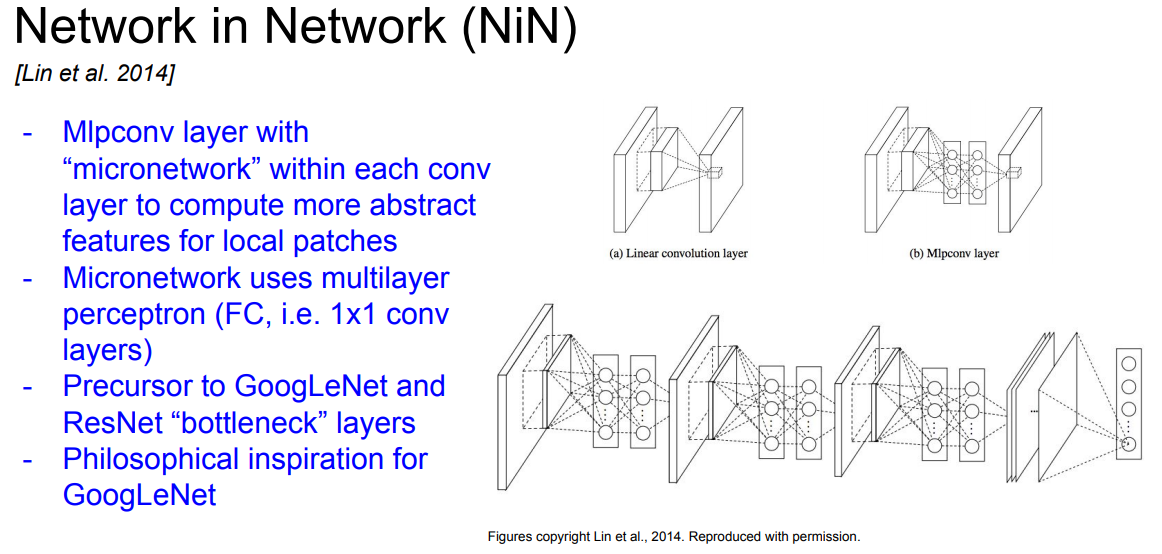

# Identity ResNet

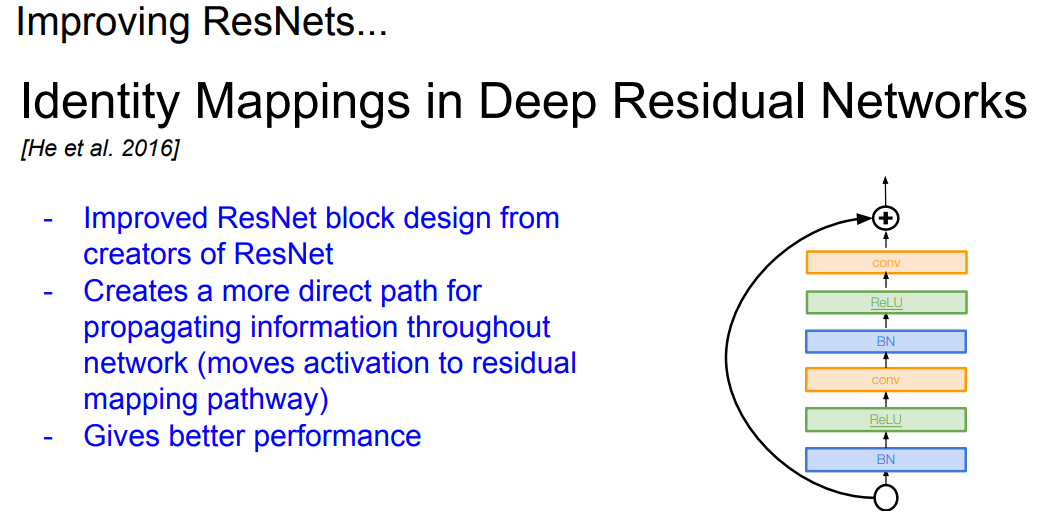

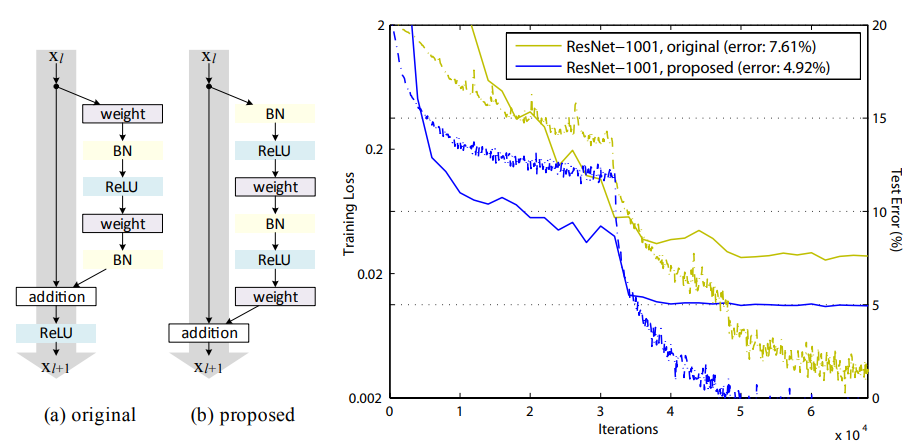

# Wide ResNet - улучшенная версия ResNet
Особенно хорошо себя показывает на CIFAR датасете

https://arxiv.org/pdf/1605.07146.pdf

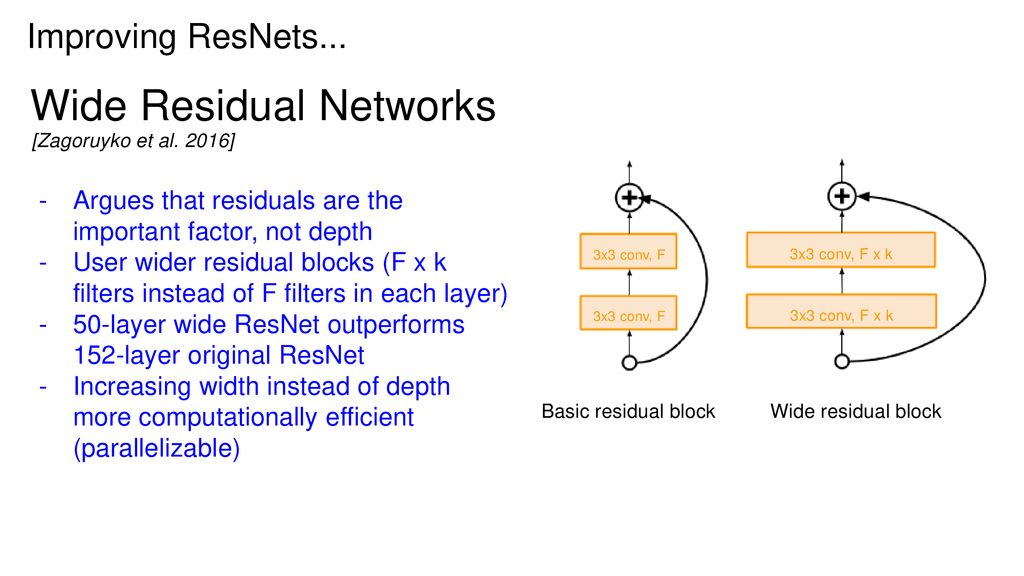

# ResNext

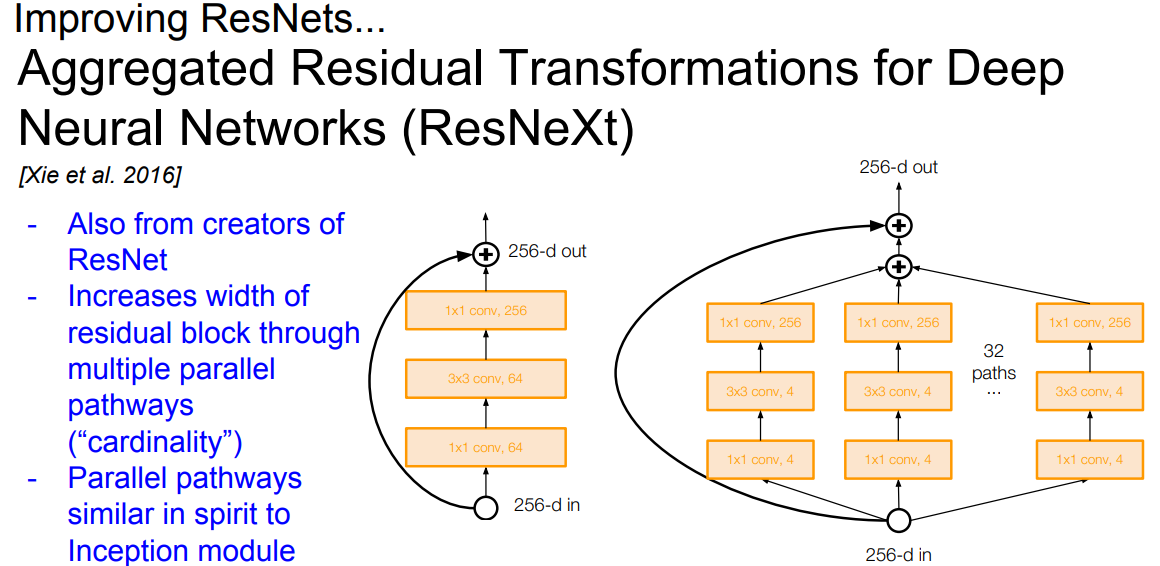

# Stohastic

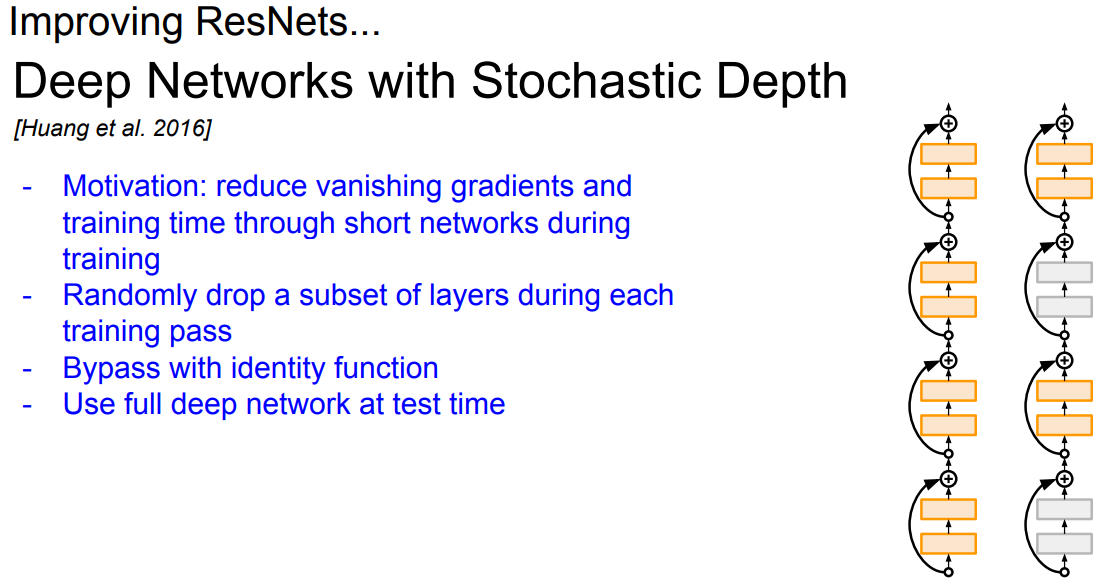

# Dense Net

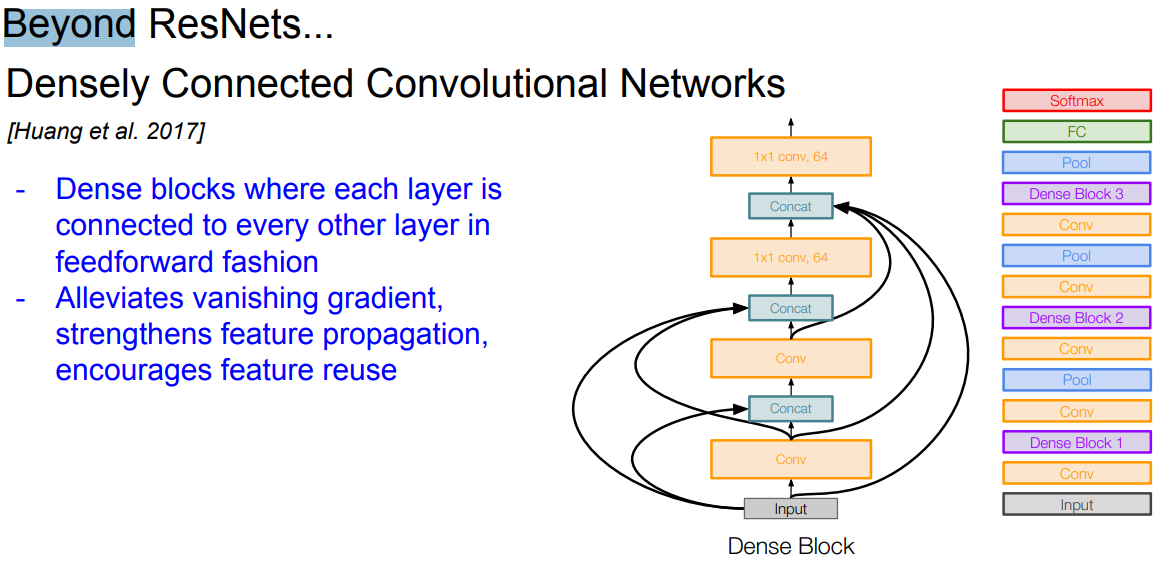